# Приступаем к работе...

In [625]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd

df_house = pd.read_csv(".//static//csv//kc_house_data.csv")
df_house.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [626]:
df_house.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [627]:
df_house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [628]:
# Процент пропущенных значений признаков
for i in df_house.columns:
    null_rate = df_house[i].isnull().sum() / len(df_house) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

print(df_house.isnull().sum())

print(df_house.isnull().any())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [629]:
# Проверка типов столбцов
df_house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Определим входные и выходные переменные (данные)  

Перед построением нечёткой системы, нужно определить, какие переменные будут входными, а какие - выходными.

**Входные переменные (fuzzy inputs)**  
Входные X: bathrooms - ванные, sqft_living - площадь  

**Выходные переменные (fuzzy output)**  
Выходные Y: price - цены.  

## Настройка лингвистических переменных  
Заключается в определении термов, которые будут соответствовать переменным, ну и их тип. (Какие-то будут функциями принадлежности, другие треугольными).

Всем параметрам присваиваются значения low, medium, high

**Создадим лингвистические переменные**

In [630]:
from skfuzzy import control as ctrl

# Определим входные и выходные переменные
sqft_living = ctrl.Antecedent(df_house['sqft_living'].sort_values(), "sqft_living")
bathrooms = ctrl.Antecedent(df_house['bathrooms'].sort_values(), "bathrooms")
price = ctrl.Consequent(df_house['price'].sort_values(), "price")

## Формирование нечётких переменных для лингвистических переменных  
Определение функций принадлежности

e:\MII\laboratory\mai\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


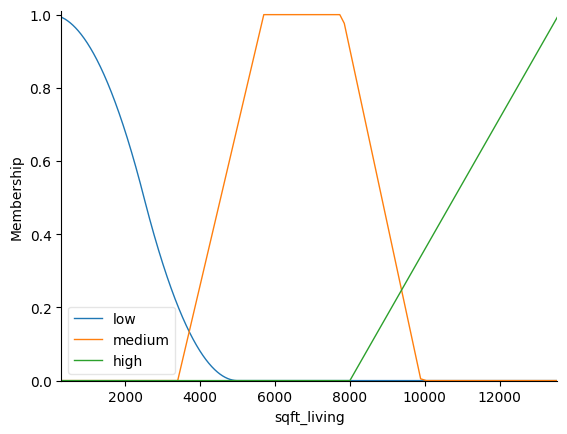

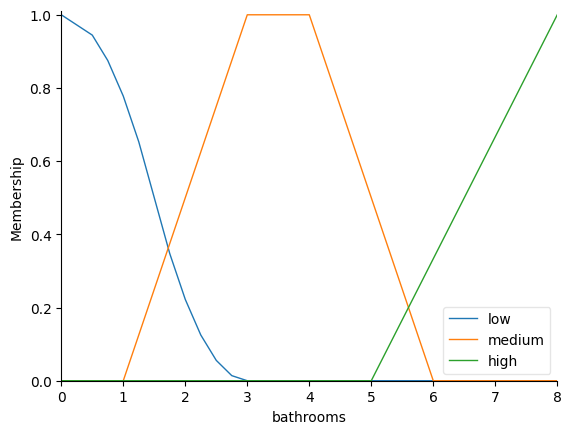

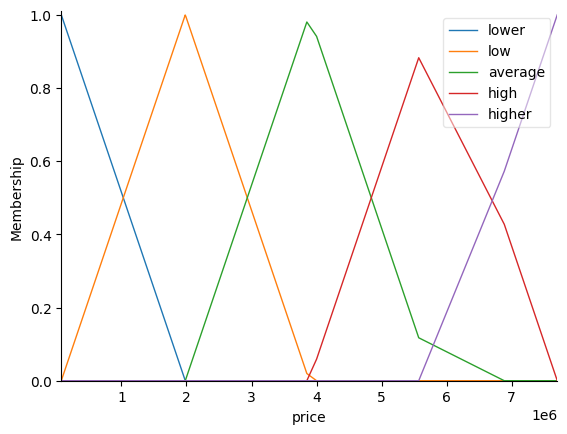

In [631]:
sqft_living['low'] = fuzz.zmf(sqft_living.universe, 0, 5000)
sqft_living['medium'] = fuzz.trapmf(sqft_living.universe, [3400, 5700, 7800, 9900])
sqft_living['high'] = fuzz.trimf(sqft_living.universe, [8000, 13580, 13580])
sqft_living.view()

bathrooms['low'] = fuzz.zmf(bathrooms.universe, 0, 3)
bathrooms['medium'] = fuzz.trapmf(bathrooms.universe, [1, 3, 4, 6])
bathrooms['high'] = fuzz.trimf(bathrooms.universe, [5, 8, 8])
bathrooms.view()

#price['low'] = fuzz.zmf(price.universe, 0, 2500000)
#price['medium'] = fuzz.trapmf(price.universe, [1500000, 3000000, 4000000, 5500000])
#price['high'] = fuzz.trimf(price.universe, [4000000, 9000000, 11000000])

# Для более точного определения цены 
price.automf(5, variable_type="quant")
price.view()

## Формирование и визуализация базы нечётких правил  
Определение правил: установим логические зависимости между входными и выходными переменными.  

**Правила:**  
&nbsp;&nbsp; 1. Если количество ванн маленькое и площадь маленькая, то цена очень дешёвая  
&nbsp;&nbsp; 2. Если количество ванн маленькое и площадь средняя, то цена дешёвая  
&nbsp;&nbsp; 3. Если количество ванн маленькое и площадь большая, то цена средняя  
&nbsp;&nbsp; 4. Если количество ванн среднее и площадь маленькая, то цена очень дешёвая  
&nbsp;&nbsp; 5. Если количество ванн среднее и площадь средняя, то цена средняя  
&nbsp;&nbsp; 6. Если количество ванн среднее и площадь большая, то цена высокая  
&nbsp;&nbsp; 7. Если количество ванн большое и площадь маленькая, то цена дешёвая  
&nbsp;&nbsp; 8. Если количество ванн большое и площадь средняя, то цена высокая  
&nbsp;&nbsp; 9. Если количество ванн большое и площадь большая, то цена очень высокая  

В случае ошибки необходимо в файле  

.venv/lib/python3.13/site-packages/skfuzzy/control/visualization.py  
удалить лишний отступ на 182 строке, должно быть:  

if not matplotlib_present:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    raise ImportError("`ControlSystemVisualizer` can only be used "  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  "with `matplotlib` present in the system.")  

self.ctrl = control_system  

self.fig, self.ax = plt.subplots()  

После этого обязательно перезапустить ядро!

(<Figure size 640x480 with 1 Axes>, <Axes: >)

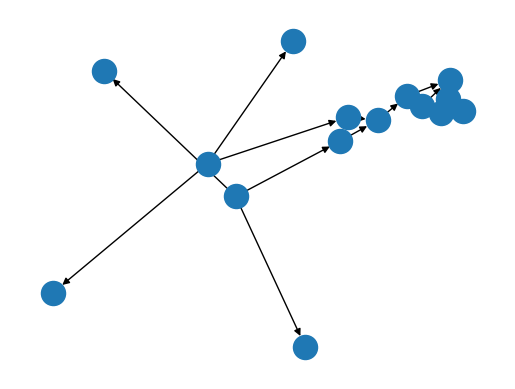

In [632]:
# Для сформированных нечётких переменных поработаем с нечёткими правилами (bathrooms, sqft_living, price)
rule1 = ctrl.Rule(bathrooms['low'] & sqft_living['low'], price['lower'])
rule2 = ctrl.Rule(bathrooms['low'] & sqft_living['medium'], price['low'])
rule3 = ctrl.Rule(bathrooms['low'] & sqft_living['high'], price['average'])
rule4 = ctrl.Rule(bathrooms['medium'] & sqft_living['low'], price['lower'])
rule5 = ctrl.Rule(bathrooms['medium'] & sqft_living['medium'], price['average'])
rule6 = ctrl.Rule(bathrooms['medium'] & sqft_living['high'], price['high'])
rule7 = ctrl.Rule(bathrooms['high'] & sqft_living['low'], price['average'])
rule8 = ctrl.Rule(bathrooms['high'] & sqft_living['medium'], price['high'])
rule9 = ctrl.Rule(bathrooms['high'] & sqft_living['high'], price['higher'])


rule1.view()

##### Создание нечёткой системы и добавление нечётких правил в базу знаний нечёткой системы

e:\MII\laboratory\mai\Lib\site-packages\skfuzzy\control\controlsystem.py:135: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


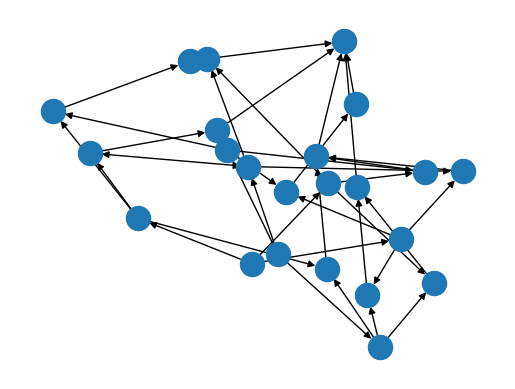

In [633]:
price_ctrl = ctrl.ControlSystem(
    [
        rule1,
        rule2,
        rule3,
        rule4,
        rule5,
        rule6,
        rule7,
        rule8,
        rule9,
    ]
)

prices = ctrl.ControlSystemSimulation(price_ctrl)
price_ctrl.view()

#### Пример расчёта выходной переменной price на основе входных переменных

In [634]:
prices.input['bathrooms'] = 1
prices.input['sqft_living'] = 3420

prices.compute()
prices.print_state()
print(prices.output['price'])

 Antecedents 
Antecedent: bathrooms               = 1
  - low                             : 0.7777777777777778
  - medium                          : 0.0
  - high                            : 0.0
Antecedent: sqft_living             = 3420
  - low                             : 0.199712
  - medium                          : 0.008695652173913044
  - high                            : 0.0

 Rules 
RULE #0:
  IF bathrooms[low] AND sqft_living[low] THEN price[lower]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - bathrooms[low]                                         : 0.7777777777777778
  - sqft_living[low]                                       : 0.199712
                       bathrooms[low] AND sqft_living[low] = 0.199712
  Activation (THEN-clause):
                                              price[lower] : 0.199712

RULE #1:
  IF bathrooms[low] AND sqft_living[medium] THEN price[low]
	AND aggregation function : fmin
	OR aggregation functi

### Визуализация функции принадлежности для выходной переменной price  

Функция получена в процессе аккумуляции и используется для дефаззификации значения выходной переменной price

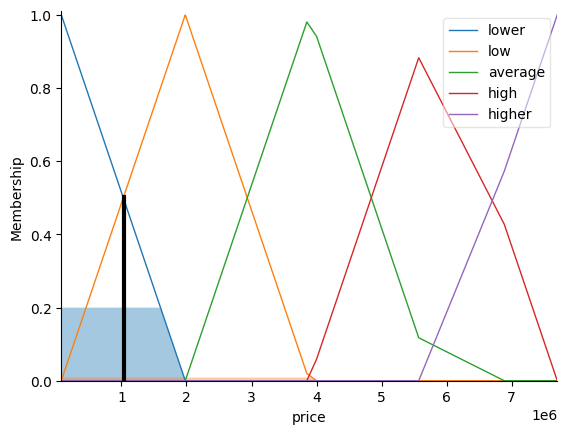

In [635]:
price.view(sim=prices)

### Тестирование нечёткой системы

In [636]:
# Функция для автоматизации вычисления целевой переменной Y на основе вектора признаков X
def fuzzy_pred(row):
    prices.input['bathrooms'] = row['bathrooms']
    prices.input['sqft_living'] = row['sqft_living']
    prices.compute()
    return prices.output['price']

res = df_house[['bathrooms', 'sqft_living', 'price']].head(100)

res['Pred'] = res.apply(fuzzy_pred, axis=1)

res.head(15)

bathrooms  sqft_living      price          Pred
0        1.00         1180   221900.0  7.360929e+05
1        2.25         2570   538000.0  8.262097e+05
2        1.00          770   180000.0  7.360929e+05
3        3.00         1960   604000.0  7.563265e+05
4        2.00         1680   510000.0  8.163228e+05
5        4.50         5420  1225000.0  3.963452e+06
6        2.25         1715   257500.0  7.754055e+05
7        1.50         1060   291850.0  8.163228e+05
8        1.00         1780   229500.0  7.429885e+05
9        2.50         1890   323000.0  7.507770e+05
10       2.50         3560   662500.0  2.661365e+06
11       1.00         1160   468000.0  7.360929e+05
12       1.00         1430   310000.0  7.360929e+05
13       1.75         1370   400000.0  8.631650e+05
14       2.00         1810   530000.0  8.163228e+05

Успешно выполнилось заполнение данными и предсказание

# Оценка результатов на основе метрик для задачи регрессии

In [637]:
import math
from sklearn import metrics

rmetrics = {}
rmetrics["RMSE"] = math.sqrt(metrics.mean_squared_error(res['price'], res['Pred']))
rmetrics["RMAE"] = math.sqrt(metrics.mean_absolute_error(res['price'], res['Pred']))
rmetrics["R2"] = metrics.r2_score(res['price'], res['Pred'])

rmetrics

{'RMSE': 712719.1570778367,
 'RMAE': 706.4876249018378,
 'R2': -4.533784587058265}

### Визуализация оценки качества нечёткой системы и проверка системы  

Тестирование работы модели, проводилось также. После того, как подали тестовые данные, система определила цену.

    bathrooms  sqft_living      price  Predicted Price
14       1.00         1140   160000.0     7.360929e+05
12       1.00         1410   175000.0     7.360929e+05
5        2.00         1710   211000.0     8.163228e+05
18       1.00         1440   355000.0     7.360929e+05
13       2.25         1960   365000.0     7.754055e+05
0        2.25         2070   365000.0     7.754055e+05
8        2.50         1600   384500.0     7.421903e+05
11       1.75         1930   385000.0     8.631650e+05
19       2.25         1960   474000.0     7.754055e+05
9        1.00          910   605000.0     7.360929e+05
10       1.00         1830   638000.0     7.463906e+05
7        2.50         1800   680000.0     7.443222e+05
4        2.50         2550   711000.0     8.233853e+05
6        2.50         2690   790000.0     8.430919e+05
17       3.25         4360   795127.0     3.861472e+06
16       1.00         1430   800000.0     7.360929e+05
1        3.00         2900   865000.0     8.720014e+05
2        2

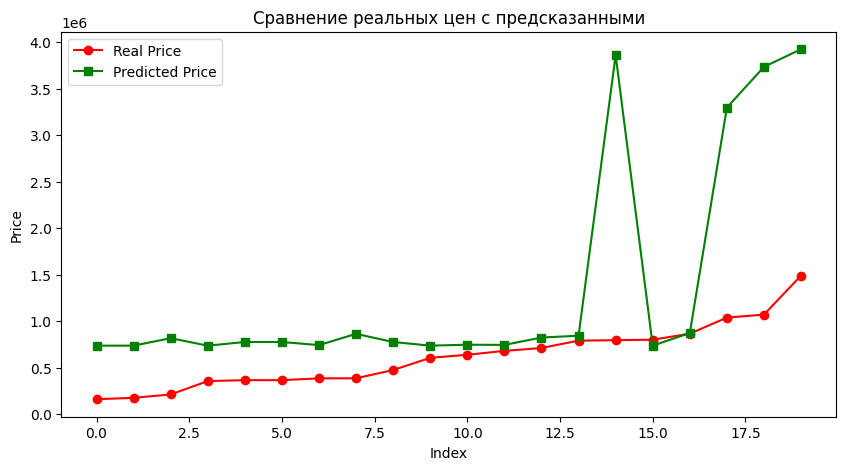

In [638]:
# Берём случайно записи из фрейма
df_random = df_house[['bathrooms', 'sqft_living', 'price']].sample(20, random_state=42)
df_random = df_random.reset_index(drop=True)


predicted_prices = []

for i in range(len(df_random)):
    prices.input['bathrooms'] = df_random.loc[i, 'bathrooms']
    prices.input['sqft_living'] = df_random.loc[i, 'sqft_living']
    prices.compute()
    # a = prices.print_state()
    predicted_prices.append(prices.output['price'])


df_random['Predicted Price'] = predicted_prices
df_random_sorted = df_random.sort_values(by='price')


# Вывод результатов
print(df_random_sorted[['bathrooms', 'sqft_living', 'price', 'Predicted Price']])

# Визуализация графиком
plt.figure(figsize=(10, 5))
plt.plot(df_random.index, df_random_sorted['price'], marker='o', label='Real Price', color='red')
plt.plot(df_random.index, df_random_sorted['Predicted Price'], marker='s', label='Predicted Price', color='green')
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.title("Сравнение реальных цен с предсказанными")
plt.show()


Вывод... Стало более лучше. Результаты предсказанных цен стали точнее, а некоторые цены почти совпали.  

Система лучше предсказывает цену, по входным характеристикам. По крайней мере предсказание стало лучше предыдущего.  

Как-то так ^_^